# Coding assignement : Traffic flow

Nous allons considérer le flux du trafic sur une voie d'autoroute. Comment pouvons nous décrire le comportement général d'un tel système?
Nous pouvons définir la vitesse du trafic, V, en km/h. On peut aussi définir une densité de trafic, rho, en voitures par kilomètre. Enfin, on peut définir un flux de trafic, F, en voitures par heure.
Une équation qui décrirait ce système est: 

$$V=V_{max}\left(1-\frac{\rho}{\rho_{max}}\right)(1)$$

Si on décrit le flux de trafic, F, comme:
$$F = V\rho$$
Alors,
$$F = F(\rho) = V(\rho)\rho = V_{max} \rho \left(1 - \frac{\rho}{\rho_{max}} \right)(2)$$

La vitesse de l'onde est $$V = \frac{\partial F}{\partial \rho}$$

Un flux de trafic instable peut être modélisé par la convection non-linéaire de la densité de voiture donnée par:

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0$$

Avec la règle de la chaîne, cela devient:
$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

Nous allons discrétiser cette équatiion en utilisant la méthode "forward-difference" pour le temps et "backward-difference" pour l'espace.

$$\rho_i^{n+1} = \rho_i^n - c \frac{\Delta t}{\Delta x}(F_i^n-F_{i-1}^n)(3)$$




Pour commencer, introduisons les fonctions numpy nécessaires à notre code:

In [66]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Conditions initiales:

In [67]:
Vmax = 80 #vitesse maximum km/h
L = 11 #longueur du tronçon en km
rhomax = 250 #densité de trafic en voitures par km
nx = 51 #nombre d'intervalles de longueur dx
dx = L/(nx-1) #longueur d'un intervalle en km (=0.22km)
dt = .001 #durée d'un intervalle en heure

### SIMULATION RESULTS: PART A

Utilisons les conditions initiales suivantes pour la densité du trafic:

In [68]:
x = numpy.linspace(0,L,nx) #création d'une échelle de distance
rho0 = numpy.ones(nx)*10 #création d'un tableau reprenant les densités par intervalle de distance
rho0[10:20] = 50

Graphique de la densité du trafic en fonction de la distance:

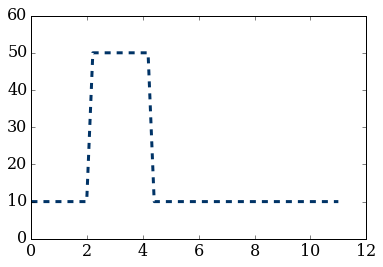

In [69]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

### Question 1

Nous avons les valeurs de $\rho$, à l'aide de $(1)$ nous pouvons calculer la vitesse des voitures en tout point.

In [70]:
V=numpy.empty(nx)
V=Vmax*(1-rho0/rhomax)/3.6 #On divise par 3.6 pour passer en m/s

Graphique de la vitesse en fonction de la position:

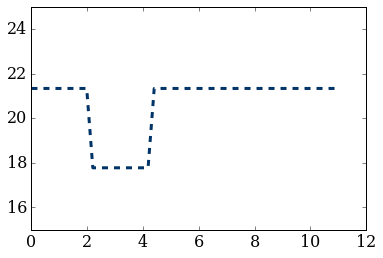

In [71]:
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);

In [72]:
print("La plus petite vitesse initiale vaut", min(V), "m/s.")

La plus petite vitesse initiale vaut 17.7777777778 m/s.


### Question 2

Avec notre algorithme, nous pouvons calculer en chaque point la valeur de $F_i^n$, sur base de $\rho_i^n$, qui va nous permettre de calculer$\rho_i^{n+1}$ en vertu de la relation $(3)$.
Nous devons trouver la vitesse moyenne en m/s après 3min. Remarquons que 3min équivalent à 0.05h, le pas étant de 0.001h, il faut répéter l'algorithme 50 fois.

In [73]:
nt = 50 #nombre d'intervalles de temps de durée dt dans 3min
F=numpy.empty(nx)
F[0]=Vmax*rho0[0]*(1-rho0[0]/rhomax) #valeur initiale du flux (nécessaire pour que l'algorithme se déroule bien)

for n in range(nt):                 
    rho=rho0.copy()
    
    for i in range(1,nx): 
        F[i]=Vmax*rho0[i]*(1-rho0[i]/rhomax) #(2)
        rho0[i] = rho[i]-dt/dx*(F[i]-F[i-1]) #(3)

Graphique de la densité en fonction de la position (après 3 min):

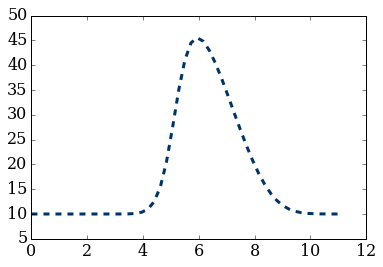

In [74]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(5,50);

Créons un algorithme pour calculer la vitesse moyenne après 3min:

In [75]:
vm3=0 # on initialise la vitesse moyenne comme étant 0 pour ne pas fausser l'algorithme

for i in range(nx):
    V[i] = Vmax*(1-rho0[i]/rhomax)/3.6 #(2)
    vm3 = vm3+V[i]

vm3=vm3/51

print("La vitesse moyenne après 3 minutes vaut", vm3, "m/s.")

La vitesse moyenne après 3 minutes vaut 20.6361661961 m/s.


Graphique de la vitesse en fonction de la position (après 3minutes):

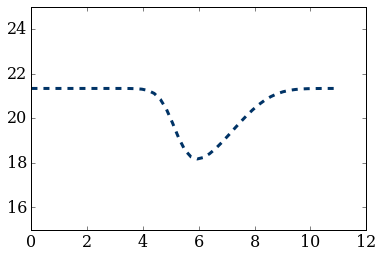

In [76]:
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);

### Question 3

Nous réutilisons le même algorithme que précédement pour trouver les valeurs de  $F_i^n$ et $\rho_i^{n+1}$. Nous répétons l'algorithme 100 fois pour arriver aux valeurs de ces derniers après 6 minutes. Trouvons ensuite la valeur minmiale de la vitesse après 6 minutes.

In [77]:
rho00 = numpy.ones(nx)*10                       #Nous réinitialisons les valeurs de rho
rho00[10:20] = 50
F[0]=Vmax*rho00[0]*(1-rho00[0]/rhomax)            #Nous initions la première valeur de F
for n in range(2*nt):
    rho=rho00.copy()
    for i in range(1,nx): 
        F[i]=Vmax*rho00[i]*(1-rho00[i]/rhomax)
        rho00[i] = rho[i]-dt/dx*(F[i]-F[i-1])

Graphique de la densité en fonction de la position (après 6min):

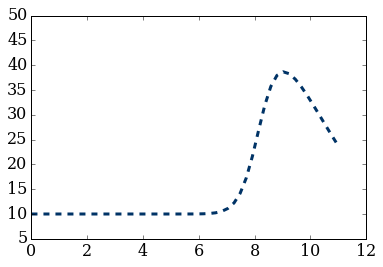

In [78]:
pyplot.plot(x, rho00, color='#003366', ls='--', lw=3)
pyplot.ylim(5,50);

In [79]:
for i in range(nx):
    V[i]=Vmax*(1-rho00[i]/rhomax)/3.6
vmin6=min(V)
print("La valeur minimale de la vitesse après 6 minutes est", vmin6 ,"m/s")

La valeur minimale de la vitesse après 6 minutes est 18.7847168709 m/s


Graphique de la vitesse en fonction de la position (après 6min):

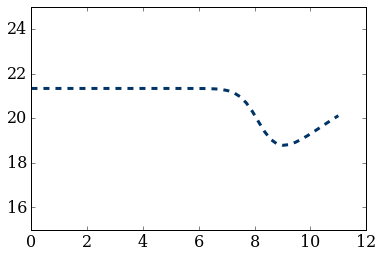

In [80]:
pyplot.plot(x, V, color='#003366', ls='--', lw=3)
pyplot.ylim(15,25);

### SIMULATION RESULTS: PART B

### Question 1

Utilisons les nouvelles conditions initiales.

In [81]:
Vmax2=136# nouvelle vitesse maximale en km/h
x = numpy.linspace(0,L,nx) #création d'une échelle de distance
rho02 = numpy.ones(nx)*20 #création d'un nouveau tableau reprenant les densités par intervalle de distance
rho02[10:20] = 50

Graphique de la densité en fonction de la position:

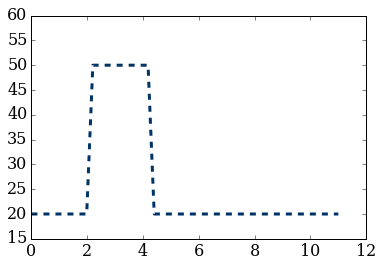

In [82]:
pyplot.plot(x, rho02, color='#003366', ls='--', lw=3)
pyplot.ylim(15,60);

In [83]:
F2=numpy.empty(nx)   #Création d'un nouveau tableau pour les valeurs de F
V2=numpy.empty(nx)   #Création d'un nouveau tableau pour les valeurs de V
V2=Vmax2*(1-rho02/rhomax)/3.6 #On calcule la vitesse initiale en chaque point, et la mettons en unité universelle
vmin2=min(V2)          #On prend la valeur minimal de ce tableau
print("La valeur initiale minimale de la vitesse est", vmin2 ,"m/s")


La valeur initiale minimale de la vitesse est 30.2222222222 m/s


### Question 2

Nous réutilisons l'algorithme de la Question 2 - Part A car nous avons la même question pour des valeurs initiales différentes. Nous répetons donc encore l'algorithme 50 fois pour arriver à un temps de 3 minutes. Trouvons ensuite la valeur moyenne de la vitesse à ce moment.

In [84]:
F2[0]=Vmax2*rho02[0]*(1-rho02[0]/rhomax)    #Initialisation de la première valeur de F
for n in range(nt):
    rho2=rho02.copy()
    for i in range(1,nx): 
        F2[i]=Vmax2*rho02[i]*(1-rho02[i]/rhomax)
        rho02[i] = rho2[i]-dt/dx*(F2[i]-F2[i-1])

Graphique de la densité en fonction de la position:

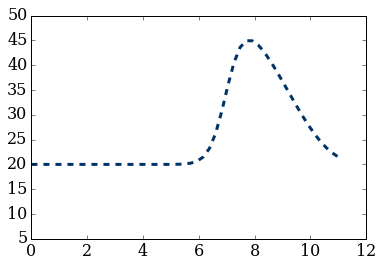

In [85]:
pyplot.plot(x, rho02, color='#003366', ls='--', lw=3)
pyplot.ylim(5,50);

In [86]:
vmt2=0               #On initialise la valeur de la vitesse moyenne
for i in range(nx):
    V2[i]=Vmax2*(1-rho02[i]/rhomax)/3.6   #on effectue la moyenne et la mettons en unité universelle
    vmt2=vmt2+V2[i]
vmt2=vmt2/51
print("La vitesse moyenne après 3 minutes est", vmt2 ,"m/s")

La vitesse moyenne après 3 minutes est 33.872218191 m/s


Graphique de la vitesse en fonction de la position (après 3 min):

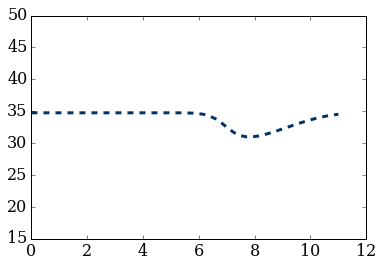

In [87]:
pyplot.plot(x, V2, color='#003366', ls='--', lw=3)
pyplot.ylim(15,50);

Graphique de la desnité en fonction de la position (après 3 min):

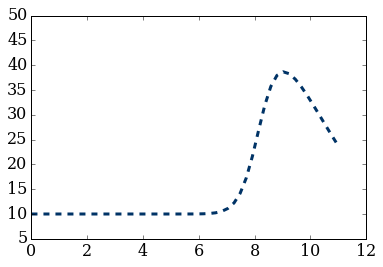

In [88]:
pyplot.plot(x, rho00, color='#003366', ls='--', lw=3)
pyplot.ylim(5,50);

### Question 3

Nous avons déjà les valeurs de la vitesse après 3 minutes pour toutes les positions. Trouvons la valeur minimale de la vitesse après 3 minutes.

In [89]:
vmin3=min(V2)       #On prend la valeur minimale de la vitesse
print("La valeur minimale de la vitesse après 3 minutes est", vmin3 ,"m/s")

La valeur minimale de la vitesse après 3 minutes est 30.9864026806 m/s
